In [1]:
# Reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

# Import all necessary libraries.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Use the 20 Newsgroups corpus from scikit to show how we might classify these short documents into categories.
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# Select just a few of these categories, and download the training and testing set.
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale', 'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
# Convert a collection of text documents to a matrix of token counts.
cv = CountVectorizer()
# Naive Bayes classifier for multinomial models.
mnb = MultinomialNB()
# Create a pipeline that attaches the vectorizer to a multinomial naive Bayes classifier.
model = make_pipeline(cv, mnb)

In [5]:
# Train model. Apply the model to the training data.
model.fit(train.data, train.target)
# Run validation. Predict labels for the test data.
labels = model.predict(test.data)

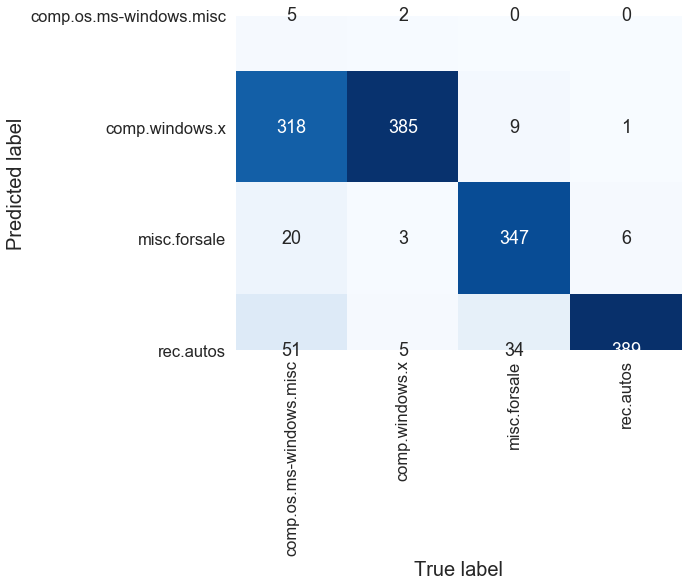

In [12]:
# Evaluate the model's performance with the confusion matrix between the true and predicted labels for the test data.
fig = plt.figure(figsize=(8,8))
mat = confusion_matrix(test.target, labels)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=20)
plt.ylabel('Predicted label', fontsize=20)
# Save figure
plt.savefig("confusion_matrix_text_classification.png", dpi=600)
plt.show()

In [15]:
print('a) O que acontece com à classe ‘comp.os.ms-windows.misc’ é que o modelo prevê que a grande maioria dos textos pertence à classe ‘comp.windows.x’ em vez da classe ‘comp.os.ms-windows.misc’. Em outras palavras, de 394 textos pertencentes à classe ‘comp.os.ms-windows.misc’, 318 (80,7% dos textos) foram classificados como à classe ‘comp.windows.x’')
print('\nTrue Positives(TP) = 5')
print('True Negatives(TN) = 1179 Se pode observar que True Positives é muito menor que True Negatives')
print('False Positives(FP) = 2')
print('False Negatives(FN) = 389')
print('True Positive Rate(‘comp.os.ms-windows.misc’) = TP/(TP+FN) = 0.013') 
print('True Negative Rate(‘comp.os.ms-windows.misc’) = TN/(TN+FP) = 0.998')

print('\nb) Isso ocorre porque o sistema está confundindo a classe ‘comp.windows.x’ com a classe ‘comp.os.ms-windows.misc’')

a) O que acontece com à classe ‘comp.os.ms-windows.misc’ é que o modelo prevê que a grande maioria dos textos pertence à classe ‘comp.windows.x’ em vez da classe ‘comp.os.ms-windows.misc’. Em outras palavras, de 394 textos pertencentes à classe ‘comp.os.ms-windows.misc’, 318 (80,7% dos textos) foram classificados como à classe ‘comp.windows.x’

True Positives(TP) = 5
True Negatives(TN) = 1179 Se pode observar que True Positives é muito menor que True Negatives
False Positives(FP) = 2
False Negatives(FN) = 389
True Positive Rate(‘comp.os.ms-windows.misc’) = TP/(TP+FN) = 0.013
True Negative Rate(‘comp.os.ms-windows.misc’) = TN/(TN+FP) = 0.998

b) Isso ocorre porque o sistema está confundindo a classe ‘comp.windows.x’ com a classe ‘comp.os.ms-windows.misc’
